In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

## Read in Parking Violation Data

In [2]:
pv = pd.read_csv('/Users/Hong/Desktop/Crime-in-Philadelphia/Winter 20-21/Parking Violations/Parking-Violation.csv', index_col=False)

In [3]:
pv.head()

,Unnamed: 0,zip_code,issue_datetime,state,violation_desc,fine,issuing_agency,lat,lon,location,events,year,date
0,2,19118.0,2016-10-14 16:01:00,PA,METER EXPIRED,26.0,PPA,40.076825,-75.207777,8600 GERMANTOWN AVE,1,2016,2016-10-14
1,3,19107.0,2016-10-14 21:42:00,PA,METER EXPIRED CC,36.0,PPA,39.950106,-75.157848,1013 CHESTNUT ST,1,2016,2016-10-14
2,4,19107.0,2016-11-13 07:40:00,PA,METER EXPIRED CC,36.0,PPA,39.949713,-75.154705,800 CHESTNUT ST,1,2016,2016-11-13
3,6,19148.0,2016-11-10 13:17:00,PA,OVER TIME LIMIT,26.0,PPA,39.929218,-75.168272,1399 MORRIS ST,1,2016,2016-11-10
4,7,19107.0,2016-12-30 20:53:00,PA,METER EXPIRED CC,36.0,PPA,39.956122,-75.154116,234 N 9TH ST,1,2016,2016-12-30


In [4]:
pv[["zip_code", "fine", "lat", "lon", "year"]].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,zip_code,fine,lat,lon,year
count,5760749.00000,5760749.00000,5760749.00000,5760749.00000,5760749.00000
mean,19123.06670,44.77662,39.96704,-75.16370,2014.62007
std,17.76986,34.99045,0.03524,0.03532,1.72497
min,19102.00000,15.00000,39.57073,-75.98698,2012.00000
25%,19104.00000,26.00000,39.94768,-75.17574,2013.00000
50%,19123.00000,36.00000,39.95369,-75.16473,2015.00000
75%,19142.00000,51.00000,39.97059,-75.15060,2016.00000
max,19192.00000,1001.00000,40.36864,-74.96297,2017.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c901ac0>,
      dtype=object)

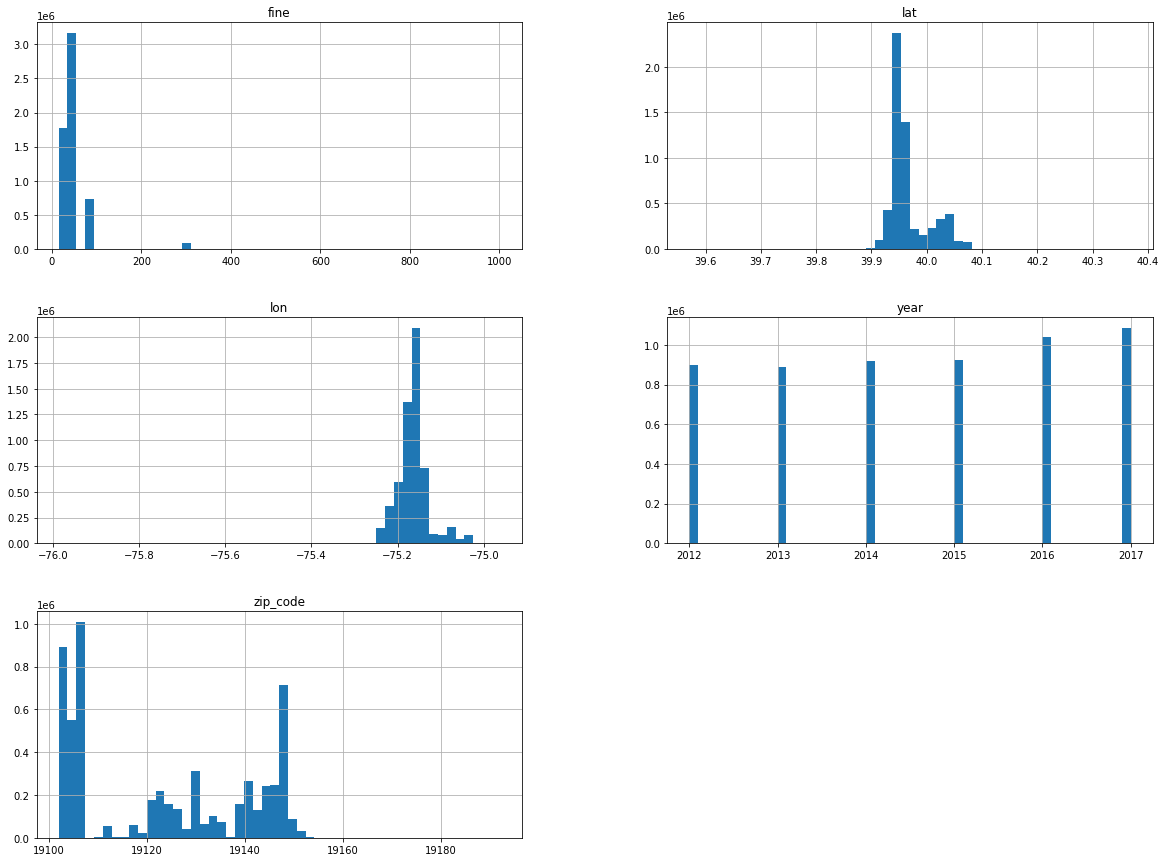

In [5]:
pv[["zip_code", "fine", "lat", "lon", "year"]].hist(bins=50, figsize=(20,15))

In [6]:
pv = pv[["lat", "lon", "zip_code"]]

In [7]:
len(pv)

5760749

In [8]:
for p in pv:
    value = pv[p].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",p)

In [9]:
pv.zip_code.value_counts().index

Float64Index([19103.0, 19107.0, 19104.0, 19147.0, 19106.0, 19130.0, 19146.0,
              19102.0, 19123.0, 19148.0, 19139.0, 19145.0, 19140.0, 19141.0,
              19127.0, 19124.0, 19121.0, 19144.0, 19149.0, 19120.0, 19142.0,
              19134.0, 19118.0, 19143.0, 19111.0, 19128.0, 19136.0, 19132.0,
              19125.0, 19133.0, 19135.0, 19129.0, 19122.0, 19131.0, 19119.0,
              19151.0, 19152.0, 19138.0, 19150.0, 19126.0, 19110.0, 19153.0,
              19115.0, 19114.0, 19116.0, 19137.0, 19109.0, 19154.0, 19108.0,
              19112.0, 19192.0],
             dtype='float64')

In [10]:
len(pv.zip_code.value_counts())

51

In [11]:
pv_zip_max = pv.groupby(by = ['zip_code'])[["lat", "lon"]].max()
pv_zip_min = pv.groupby(by = ['zip_code'])[["lat", "lon"]].min()

pv_zip_key = pd.merge(pv_zip_min, pv_zip_max, on=pv_zip_min.index, how='inner')
pv_zip_key = pv_zip_key.rename(columns={"key_0": "Zip", "lat_x": "Lat_min", "lon_x": "Lon_min",
                                                          "lat_y": "Lat_max", "lon_y": "Lon_max"})

In [12]:
pv_zip_key.head()

,Zip,Lat_min,Lon_min,Lat_max,Lon_max
0,19102.0,39.750047,-75.600625,40.115910,-75.0
1,19103.0,39.758178,-75.598917,40.075822,-75.0
2,19104.0,39.571743,-75.661298,40.140162,-75.0
3,19106.0,39.936660,-75.240672,40.037538,-75.0
4,19107.0,39.890290,-75.265717,40.025930,-75.0


## Combine with Crime-Weather Data

In [13]:
crimeData = pd.read_csv("crime_w_weather.csv")

/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
crimeData.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,...,Avg RH,Avg Wind Speed,Avg Wind Dir,Avg Press,Total Precip,Num Observations,Type,Wind_Category,Rain_Category,SEASON
0,0,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,...,47,7,248,1018.8,NaN,20,Non-Violent,Light Breeze,No rain,Summer
1,1,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,...,74,7,152,1009.0,NaN,23,Non-Violent,Light Breeze,No rain,Summer
2,2,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,...,39,9,235,1011.2,NaN,24,Violent,Gentle Breeze,No rain,Spring
3,3,23,K,2009-02-10 14:33:00,2009-02-10,14:33:00,14,200923006310,2200 BLOCK RIDGE AVE,800.0,...,67,3,186,1023.2,0.001,23,NaN,Light Air,Light rain,Winter
4,4,22,3,2015-10-06 18:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,...,60,5,267,1017.0,NaN,24,Violent,Light Breeze,No rain,Fall


In [15]:
crimeData.columns


Index(['Unnamed: 0', 'Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat',
       'events', 'year', 'Date', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type', 'Wind_Category', 'Rain_Category', 'SEASON'],
      dtype='object')

In [16]:
for index, c in crimeData[0:5].iterrows():
    print(c['Lat'], c['Lon'])

40.036389 -75.130477
39.969532 -75.16635
39.94007 -75.166412
39.979586 -75.171149
39.976134 -75.160229


In [17]:
for index, zk in pv_zip_key.iterrows():    
    a = zk['Lat_min']
    b = zk['Lat_max']
    c = zk['Lon_min']
    d = zk['Lon_max']
    e = zk['Zip']
    
    crimeData.loc[(crimeData['Lat'] <= b) & (crimeData['Lat'] >= a) & (crimeData['Lon'] <= d) & (crimeData['Lon'] >= c), 'Zip'] = e

In [18]:
sum(crimeData.Zip.isna())


6067

In [19]:
crimeData.Zip[0:5]

0    19149.0
1    19151.0
2    19151.0
3    19151.0
4    19151.0
Name: Zip, dtype: float64

## Visualizations

In [20]:
groupZip = crimeData.groupby(['Zip']).sum().sort_values("events", ascending = False).reset_index()
groupZip = groupZip[['Zip', 'events']]
groupZip.head(10)


,Zip,events
0,19151.0,1142750
1,19149.0,435174
2,19147.0,230561
3,19152.0,159337
4,19148.0,127065
5,19153.0,40674
6,19150.0,24717
7,19154.0,18763
8,19119.0,10301
9,19141.0,9379


In [21]:
groupZipCode = crimeData.groupby(['Zip', 'Text_General_Code', 'Type']).sum().sort_values("events", ascending = False).reset_index()
groupZipCode = groupZipCode[['Zip', 'Text_General_Code', 'Type', 'events']]
groupZipCode.head(10)


,Zip,Text_General_Code,Type,events
0,19151.0,All Other Offenses,Non-Violent,256167
1,19151.0,Thefts,Violent,137919
2,19151.0,Vandalism/Criminal Mischief,Non-Violent,91165
3,19151.0,Narcotic / Drug Law Violations,Non-Violent,84447
4,19151.0,Theft from Vehicle,Violent,81833
5,19149.0,All Other Offenses,Non-Violent,80729
6,19151.0,Fraud,Non-Violent,50215
7,19151.0,Burglary Residential,Violent,43672
8,19151.0,Recovered Stolen Motor Vehicle,Violent,42016
9,19149.0,Vandalism/Criminal Mischief,Non-Violent,39162


In [22]:
groupLonLatZip = crimeData.groupby(['Lon', 'Lat', 'Zip']).sum().sort_values("events", ascending = False).reset_index()
groupLonLatZip = groupLonLatZip[['Lon', 'Lat', 'Zip', 'events']]
groupLonLatZip.head(5)


,Lon,Lat,Zip,events
0,-75.078182,40.022416,19149.0,4272
1,-75.099584,40.028490,19149.0,3620
2,-75.156776,39.951586,19151.0,3078
3,-75.161485,39.952073,19151.0,2531
4,-75.122562,39.991480,19151.0,1925


(-74.9, -75.3)

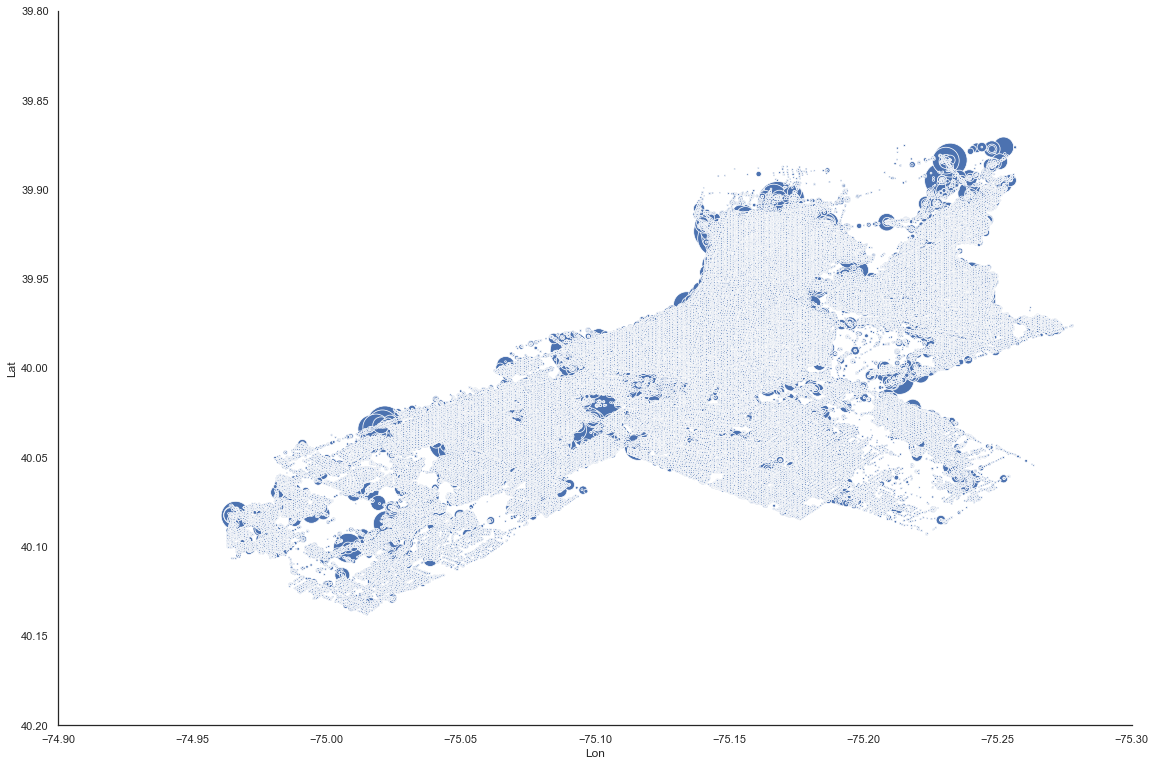

In [23]:
sns.set(style="white")
splot = sns.relplot(x="Lon", y="Lat", size="events", sizes=(3,4300), legend=None, data=groupLonLatZip)
splot.fig.set_size_inches(20, 12)
plt.ylim(40.2, 39.8)
plt.xlim(-74.9,-75.3)


Map to int - 'Type', 'Wind_Category', 'Rain_Category', 'SEASON'

In [24]:
l_dict = dict(zip(set(crimeData.Type), range(len(crimeData.Type))))
Type_num = [l_dict[x] for x in crimeData.Type]

l_dict = dict(zip(set(crimeData.Wind_Category), range(len(crimeData.Wind_Category))))
Wind_num = [l_dict[x] for x in crimeData.Wind_Category]

l_dict = dict(zip(set(crimeData.Rain_Category), range(len(crimeData.Rain_Category))))
Rain_num = [l_dict[x] for x in crimeData.Rain_Category]

l_dict = dict(zip(set(crimeData.SEASON), range(len(crimeData.SEASON))))
Season_num = [l_dict[x] for x in crimeData.SEASON]

In [25]:
crimeData["Type_num"] = Type_num
crimeData["Wind_num"] = Wind_num
crimeData["Rain_num"] = Rain_num
crimeData["Season_num"] = Season_num

In [26]:
crime_lim = crimeData[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

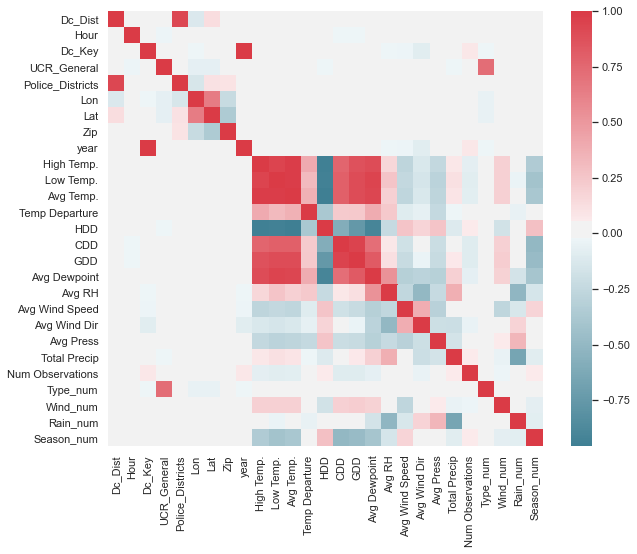

In [27]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = crime_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [41]:
# Correlation Matrix 2 (Top 10 crimes)

top10 = crimeData["Text_General_Code"].value_counts()[2:11].index

crime_top10_lim = crimeData[crimeData["Text_General_Code"].isin(top10)]


In [43]:
crime_top10_lim.groupby(['Text_General_Code', 'Type']).sum().sort_values("events", ascending = False).reset_index()[['Zip', 'Text_General_Code', 'Type', 'events']]

,Zip,Text_General_Code,Type,events
0,4.819884e+09,Thefts,Violent,254577
1,3.809476e+09,Vandalism/Criminal Mischief,Non-Violent,199280
2,3.227888e+09,Theft from Vehicle,Violent,169463
3,2.610256e+09,Narcotic / Drug Law Violations,Non-Violent,136354
4,2.167400e+09,Fraud,Non-Violent,113450
5,1.799123e+09,Recovered Stolen Motor Vehicle,Violent,94120
6,1.798195e+09,Burglary Residential,Violent,93975
7,1.308622e+09,Aggravated Assault No Firearm,Violent,68381
8,1.006973e+09,DRIVING UNDER THE INFLUENCE,Non-Violent,52604


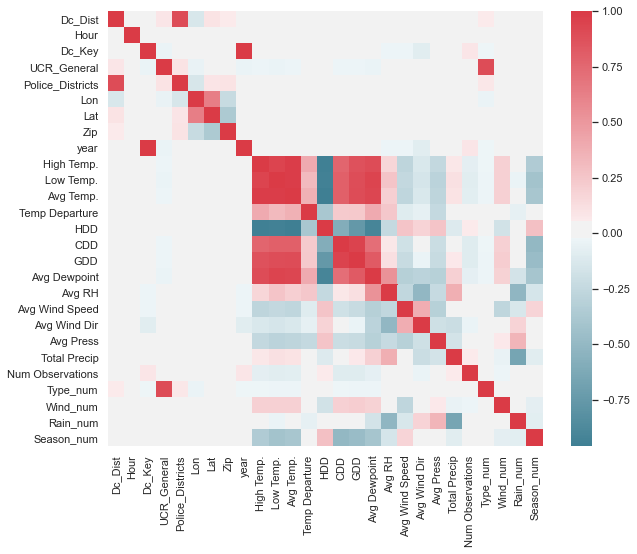

In [44]:
crime_top10_lim = crime_top10_lim[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

f, ax = plt.subplots(figsize=(10, 8))
corr = crime_top10_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


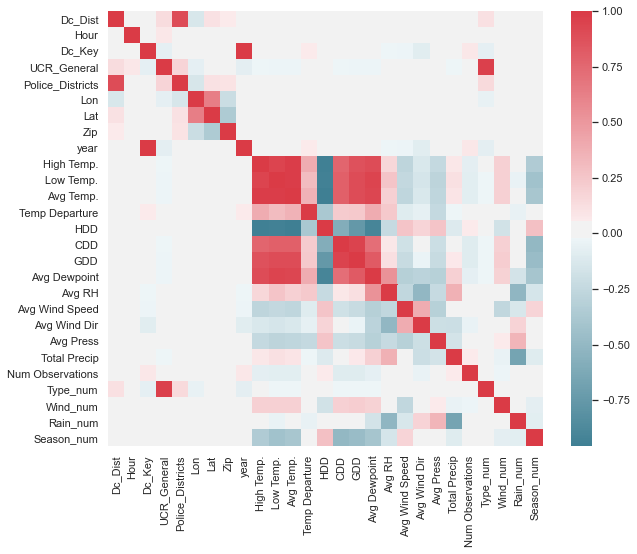

In [35]:
# Correlation Matrix 3 (Top 5 crimes)

top5 = crimeData["Text_General_Code"].value_counts()[2:6].index

crime_top5_lim = crimeData[crimeData["Text_General_Code"].isin(top5)]

crime_top5_lim = crime_top5_lim[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

f, ax = plt.subplots(figsize=(10, 8))
corr = crime_top5_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
